In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

12.222223
244.33336


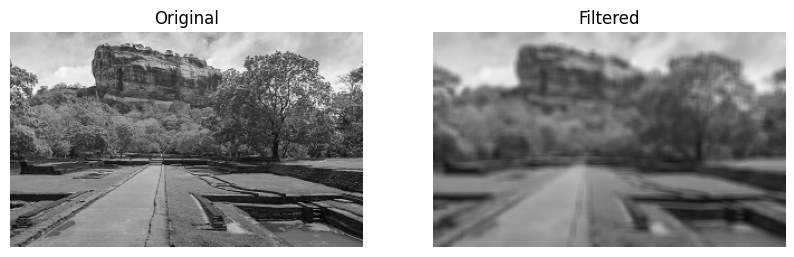

In [15]:
im = cv.imread('Images/sigiriya.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)

k_s = 6
kernel = np.ones((k_s,k_s),np.float32)/(k_s*k_s)
imavg = cv.filter2D(im,cv.CV_32F,kernel)
print(imavg.min())
print(imavg.max())
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow(imavg,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Filtered')

for a in ax:
    a.axis('off')
plt.show()

-720.0	622.0
-706.0	599.0


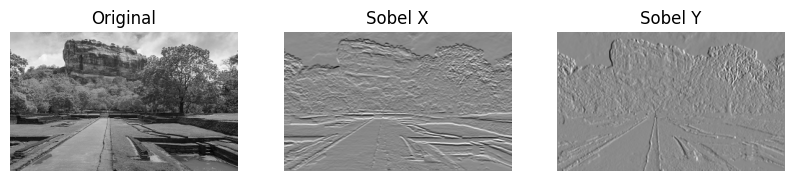

In [26]:
im = cv.imread('Images/sigiriya.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)

sobel_x = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
sobel_y = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

im_x = cv.filter2D(im,cv.CV_32F,sobel_x)
im_y = cv.filter2D(im,cv.CV_32F,sobel_y)

print(im_x.min(),im_x.max(),sep="\t")
print(im_y.min(),im_y.max(),sep="\t")

fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow((im_x+720)*255/1342,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Sobel X')
ax[2].imshow((im_y+706)*255/1305,cmap='gray',vmin=0,vmax=255)
ax[2].set_title('Sobel Y')

for a in ax:
    a.axis('off')
plt.show()


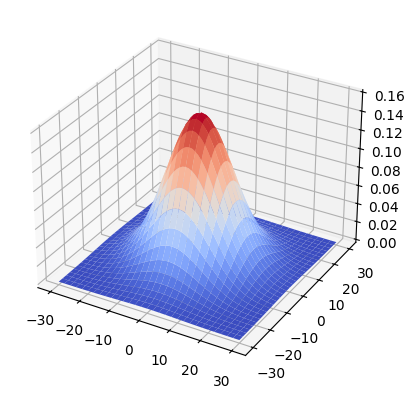

In [27]:
sigma = 10
hw = 3*sigma
x = np.linspace(start=-hw,stop=hw,num=2*hw+1)
y = np.linspace(start=-hw,stop=hw,num=2*hw+1)

X , Y = np.meshgrid(x,y)

G = 1/(2*np.pi) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,G,cmap='coolwarm')
plt.show()


In [30]:
# 1D Guassian

sigma = 1
hw = 2

x = np.linspace(start=-hw,stop=hw,num=2*hw+1)
g = 1/np.sqrt((2*np.pi)) * np.exp(-x**2/(2*sigma**2))
g

array([0.05399097, 0.24197072, 0.39894228, 0.24197072, 0.05399097])

In [39]:
# Outer product between two 1D Guassians
# Seperability of 2D Guassian matrix
# 2D Guassian can be obtained using convolving two 1D Guassians
G = np.outer(g,g)
G

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [40]:
# 3 x 3 Sobel Kernel

sobel_x = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
print(sobel_x)

a = np.array([-1,0,1])
b = np.array([1,2,1])

c = np.outer(a,b)
print(c)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
